# Predicting Iris Species Based on Key Properties

# Introduction

For our project, we will explore whether we can predict which of three species an iris is using measurements of the plant’s flower, and which measurements are the strongest predictors of species. We will be attempting to answer the question, “Can an Iris plant be classified using measurements of its flower?” We will use a dataset called “Iris Species” with 150 different measurements of iris flowers. It includes length and width measurements of both the sepal and petal, and each flower was classified as either iris setosa, iris versicolor, or iris virginica. There are 50 observations of each class. 

Dataset on irises was downloaded from https://www.kaggle.com/datasets/uciml/iris into a csv file and put into a google drive link. Then, we downloaded the file using the URL and read it into R with the read_csv function. Our data was also already tidy, so no wrangling was necessary to clean it. 

In [226]:
library(tidyverse)
library(tidymodels)
library(repr)
library(infer)
library(cowplot)

In [227]:
URL <- "https://drive.usercontent.google.com/u/0/uc?id=1nJhPS7V3n2RzNWZOMhgunLFikY5035Vv&export=download"
download.file(URL, "data/iris.csv")
iris <- read_csv("data/iris.csv") |>
    select(-Id) |>
    mutate(Species = as_factor(Species))
iris

Rows: 150 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (5): Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


# Explorary Data Analysis

We created training data by splitting the data into 3/4 for training, as shown in the table below. We generated scatter plots for petal length and petal width, sepal length and sepal width, petal length and sepal length, petal length and sepal width, petal width and sepal length, and petal width and sepal width, respectively. After generating the plots, it is clear that petal width and length is the most identifiable feature of an iris that determines its species due to its clear clusters for each species. Therefore, we will focus on petal width and length for our following data analysis.

In [228]:
set.seed(4444)
iris_split <- initial_split(iris, prop = .75, strata = Species)  
iris_train <- training(iris_split)   
iris_test <- testing(iris_split)

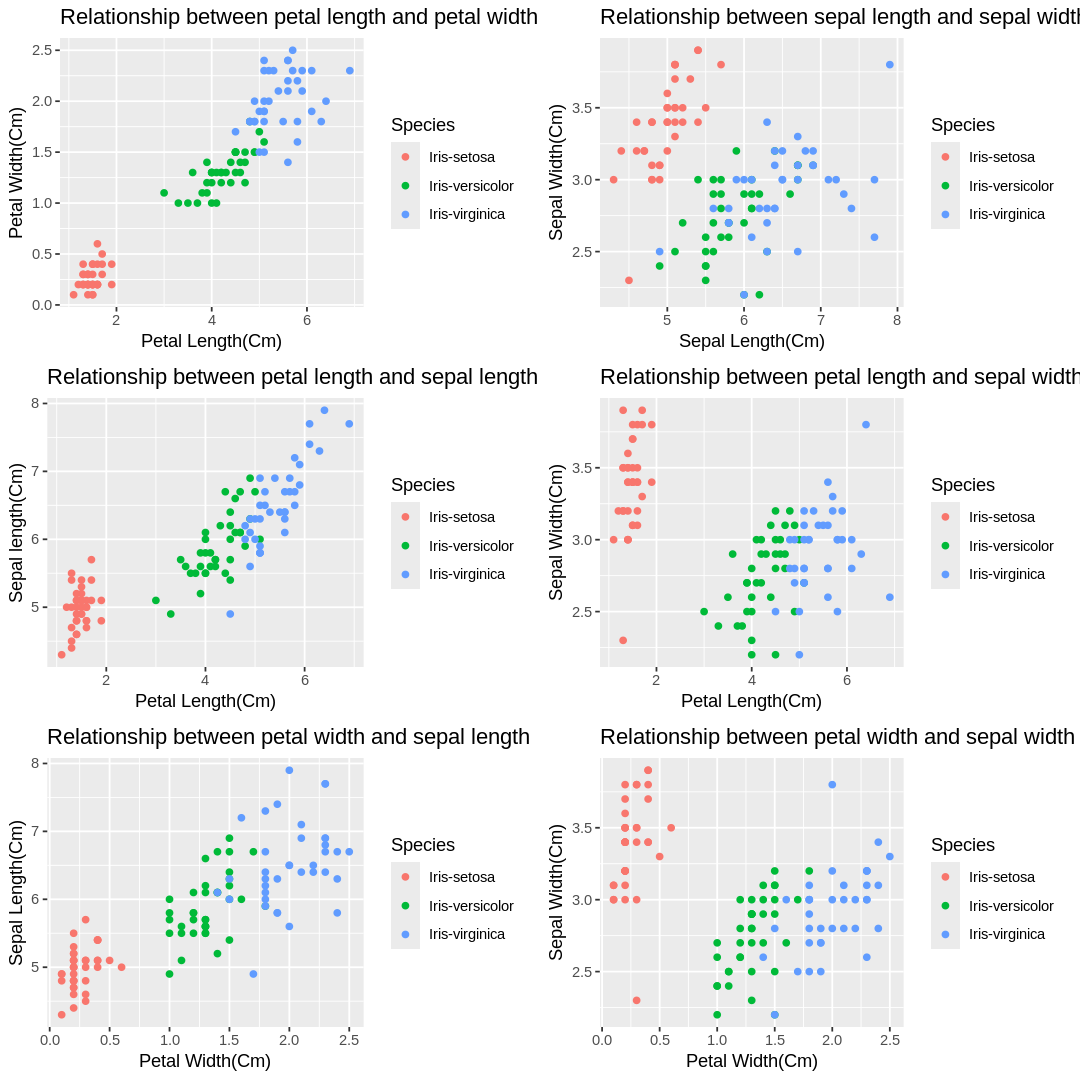

In [229]:
iris_plot <- iris_train |> 
    ggplot(aes(x = PetalLengthCm, y = PetalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Length(Cm)", y = "Petal Width(Cm)") +
    ggtitle("Relationship between petal length and petal width ")
iris_plot2 <- iris_train |> 
    ggplot(aes(x = SepalLengthCm, y = SepalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Sepal Length(Cm)", y = "Sepal Width(Cm)") +
    ggtitle("Relationship between sepal length and sepal width ")
iris_plot3 <- iris_train |> 
    ggplot(aes(x = PetalLengthCm, y = SepalLengthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Length(Cm)", y = "Sepal length(Cm)") +
    ggtitle("Relationship between petal length and sepal length ")
iris_plot4 <- iris_train |> 
    ggplot(aes(x = PetalLengthCm, y = SepalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Length(Cm)", y = "Sepal Width(Cm)") +
    ggtitle("Relationship between petal length and sepal width ")
iris_plot5 <- iris_train |> 
    ggplot(aes(x = PetalWidthCm, y = SepalLengthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Width(Cm)", y = "Sepal Length(Cm)") +
    ggtitle("Relationship between petal width and sepal length ")
iris_plot6 <- iris_train |> 
    ggplot(aes(x = PetalWidthCm, y = SepalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Width(Cm)", y = "Sepal Width(Cm)") +
    ggtitle("Relationship between petal width and sepal width ")

options(repr.plot.width = 9, repr.plot.height = 9)
plot_grid(iris_plot,iris_plot2,iris_plot3,iris_plot4,iris_plot5,iris_plot6, ncol = 2)

In [230]:
iris_train |>
    group_by(Species) |>
    summarize(SepalLengthAvg = mean(SepalLengthCm), SepalWidthAvg = mean(SepalWidthCm), PetalLengthAvg = mean(PetalLengthCm), PetalWidthAvg = mean(PetalWidthCm))

Species,SepalLengthAvg,SepalWidthAvg,PetalLengthAvg,PetalWidthAvg
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Iris-setosa,4.983784,3.381081,1.478378,0.2594595
Iris-versicolor,5.883784,2.748649,4.243243,1.3108108
Iris-virginica,6.516216,2.924324,5.445946,2.0054054


# Methods

To determine whether flower measurements can be used as a predictor, we will be using the observations from petal width and length since those values showed significant impact on the outcome in determining iris species. Sepal width showed no significant impact on determining iris species and sepal length showed a very weak relationship to species, so it will not be used. We will construct a classification model using ⅔ of the data for training and ⅓ for testing. We will then test our model and find its prediction precision to evaluate how successful our model is. We will visualize the data in a scatter plot

***Expected Outcome and Significance***

With our classification model we expect a prediction of a setosa iris given a lower petal width and length, a versicolor iris given a medium petal width and length, and a virginica iris given a high petal width and length. We expect our model to be effective at identifying iris species because our exploratory analysis showed distinct clusters. This model is expected to be good at identifying iris species from the wild. This classification process could be expanded to other species or more measurements could be used as predictors. 

# Classification Analysis

First, we used a KNN classification model to tune the model and perform 5-fold cross-validation to find the optimal K value.

In [231]:
set.seed(4444)
iris_vfold <- vfold_cv(iris_train, v = 5, strata = Species) 

In [232]:
iris_recipe <- recipe(Species ~., data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
    
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

iris_results <- workflow() |>
  add_recipe(iris_recipe) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- iris_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9178571,5,0.03690476,Preprocessor1_Model01
2,accuracy,multiclass,0.9178571,5,0.03690476,Preprocessor1_Model02
3,accuracy,multiclass,0.9178571,5,0.03185497,Preprocessor1_Model03
4,accuracy,multiclass,0.9178571,5,0.03185497,Preprocessor1_Model04
5,accuracy,multiclass,0.9357143,5,0.02369018,Preprocessor1_Model05
6,accuracy,multiclass,0.9357143,5,0.02369018,Preprocessor1_Model06
7,accuracy,multiclass,0.9273810,5,0.01904762,Preprocessor1_Model07
8,accuracy,multiclass,0.9273810,5,0.01904762,Preprocessor1_Model08
9,accuracy,multiclass,0.9273810,5,0.01904762,Preprocessor1_Model09


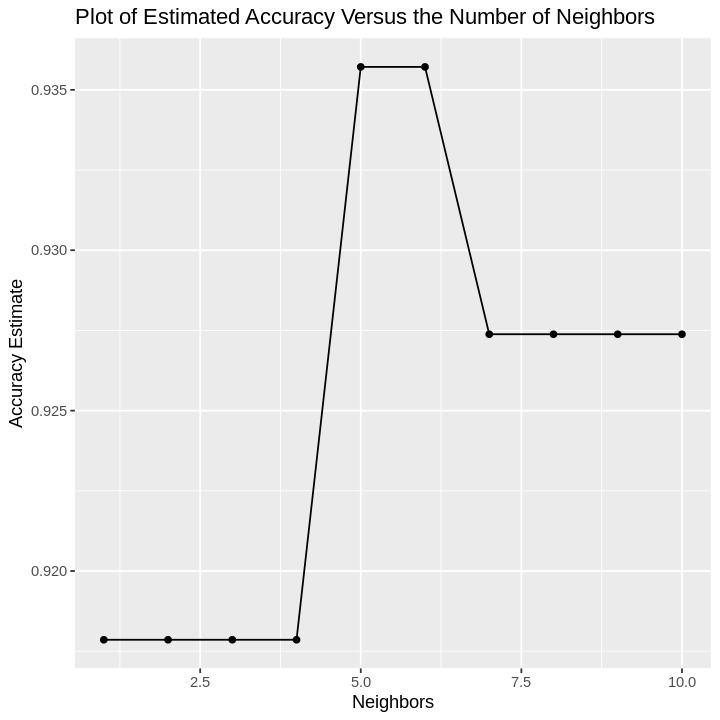

In [233]:
options(repr.plot.width = 6, repr.plot.height = 6)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  ggtitle("Plot of Estimated Accuracy Versus the Number of Neighbors")
 accuracy_vs_k

Based on the plot above, K = 5 and k = 6 provide the highest cross-validation accuracy estimate. As a result, we selected K = 5 as the classifier.

In [234]:
# Cross-validation with petal length and petal width variables
iris_recipe_PL_PW <- recipe(Species ~PetalLengthCm + PetalWidthCm, data = iris_train) |> 
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
    
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

iris_results_PL_PW <- workflow() |>
  add_recipe(iris_recipe_PL_PW) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_PL_PW <- iris_results_PL_PW |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "PL_PW") 

# Cross-validation with petal length and sepal width variables
iris_recipe_PL_SL <- recipe(Species ~PetalLengthCm + SepalLengthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
    
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

iris_results_PL_SL <- workflow() |>
  add_recipe(iris_recipe_PL_SL) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_PL_SL <- iris_results_PL_SL |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "PL_SL") 

# Cross-validation with petal length and Sepal width variables
iris_recipe_PL_SW <- recipe(Species ~PetalLengthCm + SepalWidthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
    
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

iris_results_PL_SW <- workflow() |>
  add_recipe(iris_recipe_PL_SW) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_PL_SW <- iris_results_PL_SW |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "PL_SW") 

# Cross-validation with petal width and Sepal Length variables
iris_recipe_PW_SL <- recipe(Species ~PetalWidthCm + SepalLengthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
    
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

iris_results_PW_SL <- workflow() |>
  add_recipe(iris_recipe_PW_SL) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_PW_SL <- iris_results_PW_SL |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "PW_SL") 

# Cross-validation with petal width and sepal width variables
iris_recipe_PW_SW <- recipe(Species ~PetalWidthCm + SepalWidthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
    
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

iris_results_PW_SW <- workflow() |>
  add_recipe(iris_recipe_PW_SW) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_PW_SW <- iris_results_PW_SW |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "PW_SW") 

# Cross-validation with sepal width and sepal length variables
iris_recipe_SW_SL <- recipe(Species ~SepalWidthCm + SepalLengthCm, data = iris_train) |>
          step_scale(all_predictors()) |>
          step_center(all_predictors())

iris_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
    
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

iris_results_SW_SL <- workflow() |>
  add_recipe(iris_recipe_SW_SL) |>
  add_model(iris_spec) |>
  tune_grid(resamples = iris_vfold, grid = k_vals) |>
  collect_metrics()

accuracies_SW_SL <- iris_results_SW_SL |>
  filter(.metric == "accuracy") |> 
    mutate(predictors = "SW_SL") 
    

# Final results of the optimal K analysis
all_accuracies <- rbind(accuracies_PL_PW, accuracies_PL_SL, accuracies_PL_SW, accuracies_PW_SL, accuracies_PW_SW, accuracies_SW_SL)  
head(all_accuracies)
tail(all_accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config,predictors
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>
1,accuracy,multiclass,0.9547619,5,0.013256582,Preprocessor1_Model01,PL_PW
2,accuracy,multiclass,0.9464286,5,0.007529233,Preprocessor1_Model02,PL_PW
3,accuracy,multiclass,0.9464286,5,0.016835876,Preprocessor1_Model03,PL_PW
4,accuracy,multiclass,0.9464286,5,0.016835876,Preprocessor1_Model04,PL_PW
5,accuracy,multiclass,0.9464286,5,0.027147034,Preprocessor1_Model05,PL_PW
6,accuracy,multiclass,0.9464286,5,0.027147034,Preprocessor1_Model06,PL_PW


neighbors,.metric,.estimator,mean,n,std_err,.config,predictors
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>
5,accuracy,multiclass,0.7511905,5,0.05285232,Preprocessor1_Model05,SW_SL
6,accuracy,multiclass,0.7690476,5,0.05750752,Preprocessor1_Model06,SW_SL
7,accuracy,multiclass,0.7619048,5,0.05536034,Preprocessor1_Model07,SW_SL
8,accuracy,multiclass,0.7440476,5,0.05106574,Preprocessor1_Model08,SW_SL
9,accuracy,multiclass,0.7440476,5,0.03531523,Preprocessor1_Model09,SW_SL
10,accuracy,multiclass,0.7440476,5,0.03531523,Preprocessor1_Model10,SW_SL


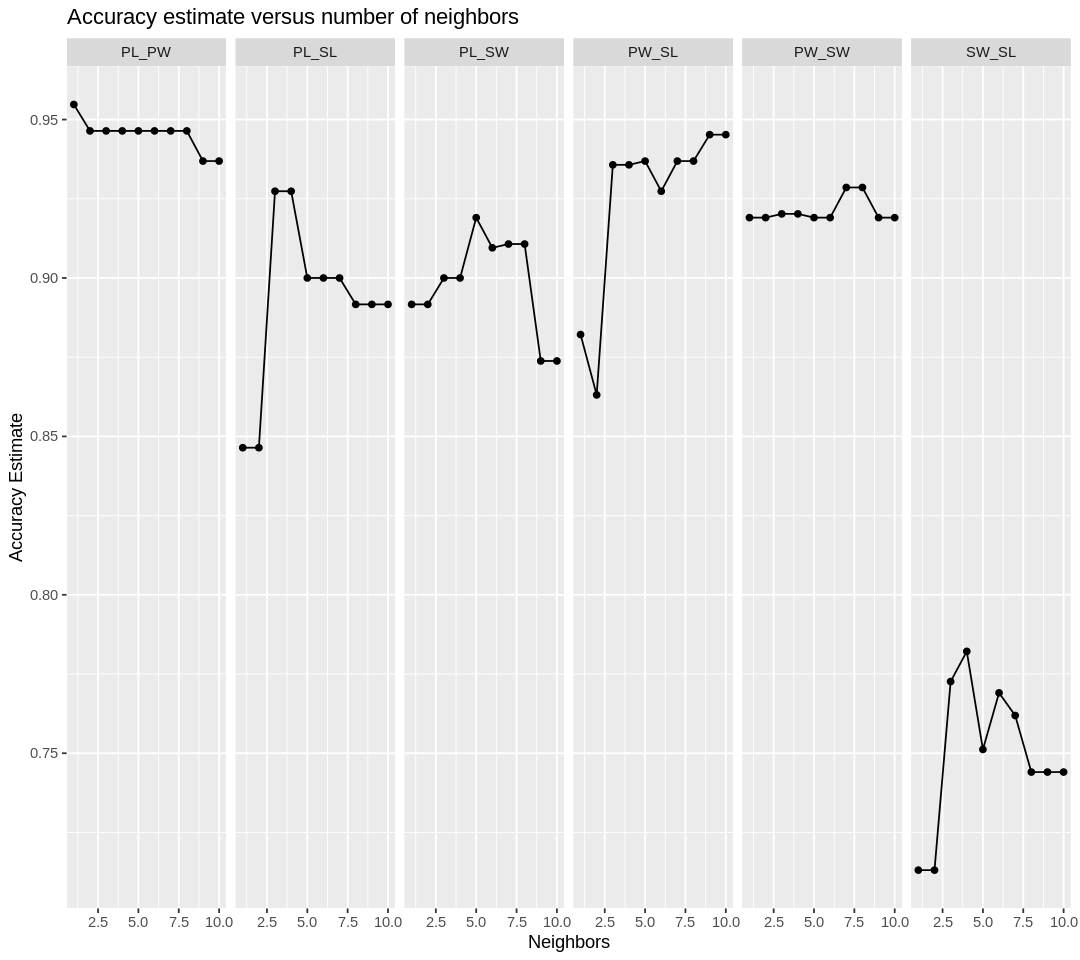

In [235]:
options(repr.plot.width = 9, repr.plot.height = 8)
all_accuracies_vs_k <- ggplot(all_accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    facet_grid(cols = vars(predictors)) +
    ggtitle("Accuracy estimate versus number of neighbors")
 all_accuracies_vs_k

After conducting cross-validation using six different pairs of variables, we reinforced the selection of k = 5, which consistently yields high accuracy across all analyses.

In [236]:
iris_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

iris_fit_final <- workflow() |>
  add_recipe(iris_recipe_PL_PW) |>
  add_model(iris_spec_final) |>
  fit(data = iris_train)

In [237]:
iris_predictions <- predict(iris_fit_final, iris_test) |>
  bind_cols(iris_test) 
iris_predictions
iris_predictions |>
  metrics(truth = Species, estimate = .pred_class) |>
  filter(.metric == "accuracy") 

.pred_class,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Iris-setosa,4.6,3.1,1.5,0.2,Iris-setosa
Iris-setosa,4.4,2.9,1.4,0.2,Iris-setosa
Iris-setosa,5.4,3.7,1.5,0.2,Iris-setosa
Iris-setosa,5.8,4.0,1.2,0.2,Iris-setosa
Iris-setosa,5.7,4.4,1.5,0.4,Iris-setosa
Iris-setosa,5.4,3.4,1.7,0.2,Iris-setosa
Iris-setosa,4.6,3.6,1.0,0.2,Iris-setosa
Iris-setosa,5.0,3.0,1.6,0.2,Iris-setosa
Iris-setosa,5.2,4.1,1.5,0.1,Iris-setosa


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,1


In [238]:
# Evaluating the predictions using confusion matrix
iris_cm <- iris_predictions |>
    conf_mat(truth = Species, estimate = .pred_class)
iris_cm
precision(iris_predictions, truth = Species, estimate = .pred_class)
recall(iris_predictions, truth = Species, estimate = .pred_class)

                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              13               0              0
  Iris-versicolor           0              13              0
  Iris-virginica            0               0             13

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,1


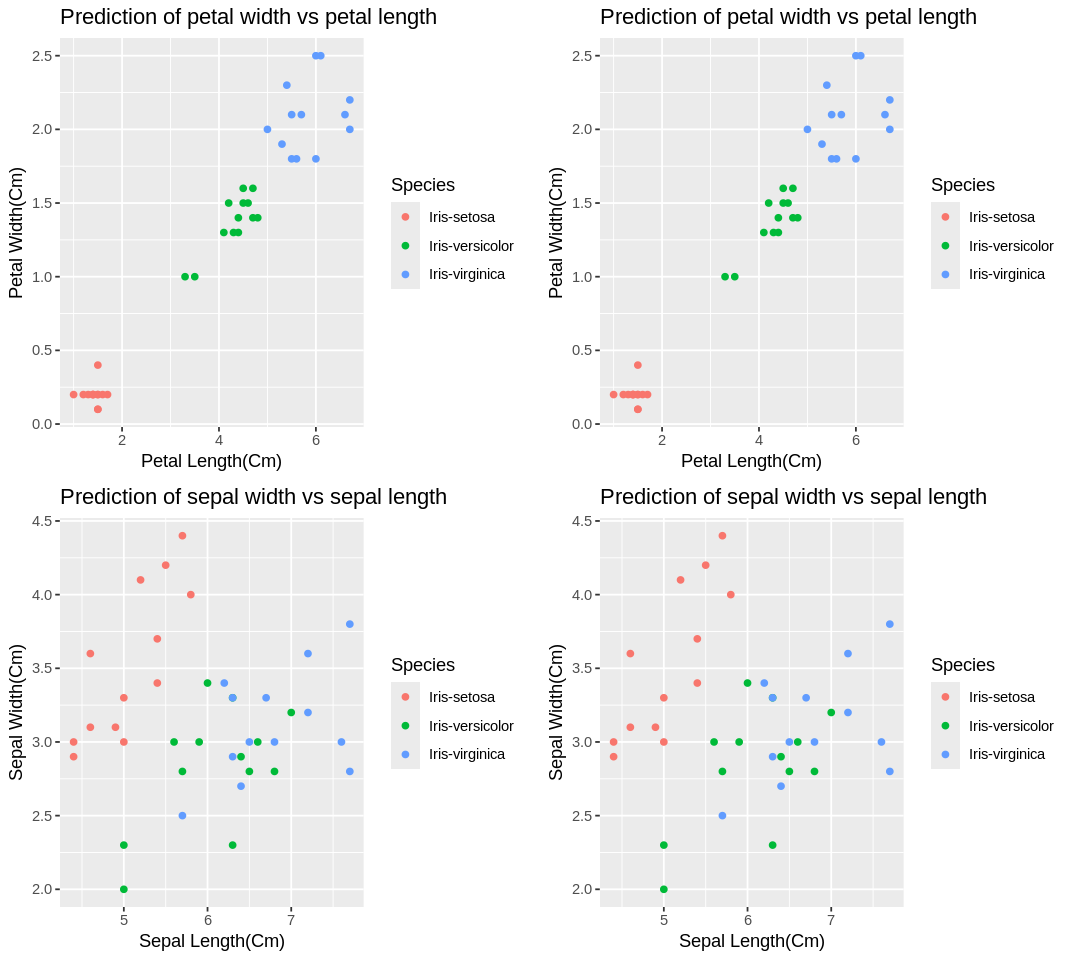

In [239]:
# Comparing the predicted results and the actual results

iris_prediction_viz1 <- iris_predictions |>
    ggplot(aes(x = PetalLengthCm, y = PetalWidthCm, color = .pred_class)) +
    geom_point() +
    labs(x = "Petal Length(Cm)", y = "Petal Width(Cm)", color = "Species") +
    ggtitle("Prediction of petal width vs petal length")
iris_actual_viz1 <- iris_predictions |>
    ggplot(aes(x = PetalLengthCm, y = PetalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Petal Length(Cm)", y = "Petal Width(Cm)") +
    ggtitle("Prediction of petal width vs petal length")
iris_prediction_viz2 <- iris_predictions |>
    ggplot(aes(x = SepalLengthCm, y = SepalWidthCm, color = .pred_class)) +
    geom_point() +
    labs(x = "Sepal Length(Cm)", y = "Sepal Width(Cm)", color = "Species") +
    ggtitle("Prediction of sepal width vs sepal length")
iris_actual_viz2 <- iris_predictions |>
    ggplot(aes(x = SepalLengthCm, y = SepalWidthCm, color = Species)) +
    geom_point() +
    labs(x = "Sepal Length(Cm)", y = "Sepal Width(Cm)", color = "Species") +
    ggtitle("Prediction of sepal width vs sepal length")
options(repr.plot.width = 9, repr.plot.height = 8)
plot_grid(iris_prediction_viz1, iris_actual_viz1, iris_prediction_viz2, iris_actual_viz2, ncol = 2)

The scatter plots indicate a positive relationship between petal length and petal width. Conversely, there is no discernible relationship between sepal length and sepal width. Additionally, the plots demonstrate that our predictive model did a very good job in predicting the flower species. 

# Discussion

After building a classification model using predictors such as petal length, petal width, sepal length, and sepal width, we found that the most effective variables for predicting flower species are petal length and petal width. Sepal length and width, on the other hand, may be less optimal for this purpose. Petal length and width are positively correlated, suggesting that these two features together can effectively differentiate between different iris species. During testing, our model achieved 100 percent accuracy, aligning with our expectations. Specifically, a setosa iris exhibits lower petal width and length, a versicolor iris displays medium petal width and length, and a virginica iris showcases higher petal width and length. 

These findings can lead to improved classification accuracy by focusing on key predictors, thereby enhancing the reliability and precision of iris species identification. In addition, streamlining feature selection to petal characteristics can simplify model complexity and reduce training time, making the classification process more efficient. Moreover, these findings reinforce existing knowledge about iris species characteristics, offering deeper insights into the distinguishing features of each species. Apart from that, they can be applied in various fields such as botany, agriculture, and environmental studies, where accurate identification of iris species is essential.

Our analysis could also lead to some future questions:
- Can we enhance the predictive power of the model by incorporating additional features or feature transformations based on petal and sepal characteristics?
- How do environmental factors or geographic variations influence the physical attributes of iris species, and can these factors be incorporated into the model for improved classification?
- How do petal length and width contribute more significantly to flower species classification compared to sepal length and width? Are there specific biological reasons for this distinction?

# References

- Fisher, R. A. (1936). Iris Species. Www.kaggle.com. https://www.kaggle.com/datasets/uciml/iris
- Rose, Michael & Christian, Wagner & Philip, Frederick. (2011). Evidence Feed Forward Hidden Markov Model: A New Type Of Hidden Markov Model. International Journal of Artificial Intelligence & Applications. 2. 